In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

#### Always use this routine on a root folder before the data folder. ################################
Alloy_name = "TiZrNbMnCr" #Just to name the figure
# folder_data = os.path.abspath(r'D:\Python\Sirius DRX\Nicole_He\merge_files') #Name of data folder

folder_data = os.path.abspath(r'D:\Python\Sirius DRX\Gabi_TiNbCr\merge_files')

positions = []

# Setting XRD measurement/data information <-- Change these parameters for each measurement ###################################
step = 0.0035  #degrees
first_point = 0.0018 #degrees
last_point = 108.8983 #degrees

#------------------------------------------------------------------------------------------------------------------------------#


# for i in range(int(first_point*10000),int((last_point+step)*10000),int(step*10000)): #from initial point to last + one step format: (initial point, last point + one step, step)
#     positions.append(i/10000)

i=0
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.csv' in arquivo:
            data=np.loadtxt(os.path.join(diretorio, arquivo),skiprows=19,delimiter= ',') #import data from each .dat in the folder_data
            data = np.round(data,decimals=5)   
            size_positions = len(data)
            positions = data[0:,0]
            i+1
            if i>0:
                break
            # matrix[np.where(matrix[1:,0]==float(arquivo[15:-21]))[0][0]+1,1:] = data[0:,1] #search the row position of temperature of each data on the column 0 and replace it with the data.
      



temperatures = []
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.csv' in arquivo:
            print(arquivo)
            temperatures.append(float(arquivo[27:-21])) #search each data temperature on all .dat files and append to a list
            
temperatures.sort() 
temperatures = np.array(temperatures)  #transforms temperature list in a numpy array and correct its magnitude

matrix = np.zeros([len(temperatures)+1,size_positions+1]) #creates a full of zeros matrix with the size and shape of the data.
matrix[1:,0] = temperatures  #turns the column 0 into a temperature header
matrix[0,1:] = positions #turns the row 0 into a position header
#note that the position [0,0] of the matrix are always 0 
for diretorio, subpastas, arquivos in os.walk(folder_data):
    for arquivo in arquivos:
        if '.csv' in arquivo:
            data=np.loadtxt(os.path.join(diretorio, arquivo),skiprows=19,delimiter= ',') #import data from each .dat in the folder_data
            data = np.round(data,decimals=5)   
            # print(len(data))
            matrix[np.where(matrix[1:,0]==float(arquivo[27:-21]))[0][0]+1,1:] = data[0:,1] #search the row position of temperature of each data on the column 0 and replace it with the data.
            
            
            
#intensity = matrix[1:,1:]            

TiNbCr004_des_600C_He_RAMP_103Celsius_289_MERGE.csv
TiNbCr004_des_600C_He_RAMP_115Celsius_291_MERGE.csv
TiNbCr004_des_600C_He_RAMP_127Celsius_293_MERGE.csv
TiNbCr004_des_600C_He_RAMP_137Celsius_295_MERGE.csv
TiNbCr004_des_600C_He_RAMP_149Celsius_297_MERGE.csv
TiNbCr004_des_600C_He_RAMP_160Celsius_299_MERGE.csv
TiNbCr004_des_600C_He_RAMP_172Celsius_301_MERGE.csv
TiNbCr004_des_600C_He_RAMP_183Celsius_303_MERGE.csv
TiNbCr004_des_600C_He_RAMP_194Celsius_305_MERGE.csv
TiNbCr004_des_600C_He_RAMP_206Celsius_307_MERGE.csv
TiNbCr004_des_600C_He_RAMP_217Celsius_309_MERGE.csv
TiNbCr004_des_600C_He_RAMP_229Celsius_311_MERGE.csv
TiNbCr004_des_600C_He_RAMP_22Celsius_269_MERGE.csv
TiNbCr004_des_600C_He_RAMP_241Celsius_313_MERGE.csv
TiNbCr004_des_600C_He_RAMP_252Celsius_315_MERGE.csv
TiNbCr004_des_600C_He_RAMP_262Celsius_317_MERGE.csv
TiNbCr004_des_600C_He_RAMP_274Celsius_319_MERGE.csv
TiNbCr004_des_600C_He_RAMP_286Celsius_321_MERGE.csv
TiNbCr004_des_600C_He_RAMP_297Celsius_323_MERGE.csv
TiNbCr004_des

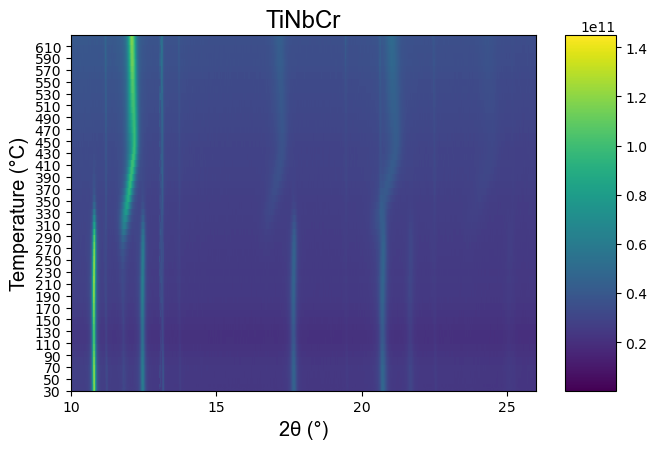

In [9]:
intensity = matrix[1:,1:]   #data matrix without the temperature and positions headers
fig = plt.figure(figsize=(7.5,4.615))

#Sobre o comando Plot=plt.pcolormesh (X, Y, Intensidade dada pela matriz, camp é o estilo de cor)


#Setting plot limits information <- Change these parameters for each different plot ########################################
xmin=10
xmax = 26

k=0
np.min(intensity[intensity>k])
ymin = 30
ymax = max(temperatures)

#-------------------------##################################################################################################

v_max =np.amax(matrix[1:,int(round((xmin - matrix[0,1])/step)):]) #This line determinates the max value in matrix from the xmin choosen


#styles 'viridis' or 'jet'
Plot=plt.pcolormesh(positions, temperatures, intensity, cmap='viridis', vmin=np.min(intensity[intensity>k]), vmax = np.max(intensity[intensity>k]))

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.xticks(np.arange(xmin,xmax,5))
# plt.yticks(np.arange(ymin,ymax+1,20))
plt.yticks(np.arange(ymin,ymax+1,20))

plt.title(r'TiNbCr', family='Arial', size='xx-large', loc='center')

plt.xlabel('2θ (°)', family='Arial', size='x-large')
plt.ylabel('Temperature (°C)', family='Arial', size='x-large')

cbar = plt.colorbar(Plot, aspect=7)

# Rename labels on colorbar
# vlabels = [i for i in range(0,int(round(v_max)), 1000)]
# vlabels.append(v_max)
# cbar.set_ticks(vlabels)
# cbar.set_ticklabels(vlabels)


my_file = f'_{Alloy_name}.png'


# ###### Verifies if already exists an figure with same name and iterate the fig name
# i=0
# for diretorio, subpastas, arquivos in os.walk(folder_data): 
#     for arquivo in arquivos:
#         if '.png' in arquivo:
#             i = float(arquivo[0])+1
            

plt.savefig(os.path.join(folder_data,str(i)+ my_file), dpi=200, bbox_inches='tight')

plt.show()